In [85]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score


In [86]:
import pandas as pd
from sklearn.datasets import fetch_openml

boston=fetch_openml(name='boston', version=2)

boston_data= pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_data['MEDV']=boston.target 

In [87]:
boston_data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,N
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,P
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,N
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,N
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,N


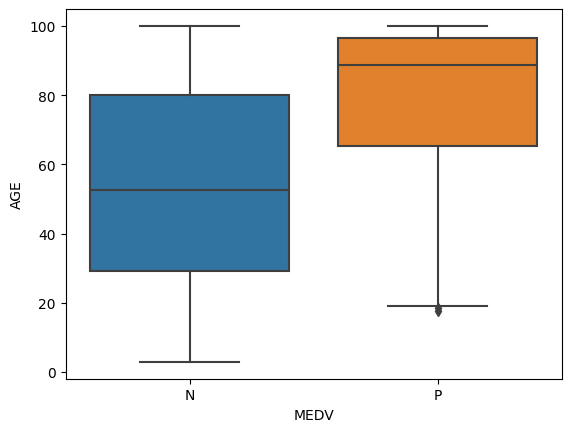

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='MEDV', y='AGE', data=boston_data)
plt.show()

In [89]:
import tensorflow as tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import itertools



In [90]:
boston_data=pd.get_dummies(boston_data, columns=['MEDV'], drop_first=True)
boston_data.replace({True:1, False:0}, inplace=True)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV_P
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0


In [91]:
X=boston_data.drop('MEDV_P',axis=1)
y=boston_data['MEDV_P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [93]:
def build_model(neuron_config, input_shape):
    model = Sequential()
    model.add(Dense(neuron_config[0], activation='relu', input_shape=(input_shape,)))

    for neurons in neuron_config[1:]:
        model.add(Dense(neurons, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [94]:
def train_and_evaluate(X_train, y_train, X_test, y_test, neuron_config, batch_size=32, epochs=5, validation_split=0.2):
    model=build_model(neuron_config, X_train.shape[1])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=0)
    y_pred=(model.predict(X_test)>0.5).astype(int)
    test_accuracy=accuracy_score(y_test, y_pred)
    return test_accuracy


In [101]:
def generate_combinations(neuron_values, num_layers):
    return list(itertools.product(neuron_values, repeat=num_layers))

def evaluate_all_combinations(X_train, y_train, X_test, y_test, neuron_values, num_layers, batch_size=32, epochs=5, validation_split=0.2):
    combinations=generate_combinations(neuron_values, num_layers)
    results={}

    for config in combinations:
        accuracy= train_and_evaluate(X_train, y_train, X_test, y_test, config, batch_size=batch_size, epochs=epochs, validation_split=validation_split)
        results[config]=accuracy
        print(f'Test Accuracy with {config} configuration: {accuracy}')
    
    sorted_results=dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
    return sorted_results        

In [102]:
neuron_values=[4,8,16]
num_layers=3

sorted_results=evaluate_all_combinations(X_train,y_train,X_test,y_test,neuron_values,num_layers)
print('Sorted Results:')
print(sorted_results)

4/4 [==============================] - 0s 5ms/step
Test Accuracy with (4, 4, 4) configuration: 0.8137254901960784
4/4 [==============================] - 0s 3ms/step
Test Accuracy with (4, 4, 8) configuration: 0.7352941176470589
4/4 [==============================] - 0s 0s/step
Test Accuracy with (4, 4, 16) configuration: 0.7254901960784313
4/4 [==============================] - 0s 3ms/step
Test Accuracy with (4, 8, 4) configuration: 0.6764705882352942
4/4 [==============================] - 0s 0s/step
Test Accuracy with (4, 8, 8) configuration: 0.7549019607843137
4/4 [==============================] - 0s 4ms/step
Test Accuracy with (4, 8, 16) configuration: 0.7941176470588235
4/4 [==============================] - 0s 5ms/step
Test Accuracy with (4, 16, 4) configuration: 0.7352941176470589
4/4 [==============================] - 0s 3ms/step
Test Accuracy with (4, 16, 8) configuration: 0.6470588235294118
4/4 [==============================] - 0s 2ms/step
Test Accuracy with (4, 16, 16) conf

In [127]:
import itertools

neuron_values = [4, 8, 16]
activation_functions = ['relu', 'tahn', 'linear']
num_layer=3

combination_1 = list(itertools.product(neuron_values, repeat=num_layer))
combination_2 = list(itertools.product(activation_functions, repeat=num_layer))
result = list(itertools.product(combination_1, combination_2))

print(result)

[((4, 4, 4), ('relu', 'relu', 'relu')), ((4, 4, 4), ('relu', 'relu', 'tahn')), ((4, 4, 4), ('relu', 'relu', 'linear')), ((4, 4, 4), ('relu', 'tahn', 'relu')), ((4, 4, 4), ('relu', 'tahn', 'tahn')), ((4, 4, 4), ('relu', 'tahn', 'linear')), ((4, 4, 4), ('relu', 'linear', 'relu')), ((4, 4, 4), ('relu', 'linear', 'tahn')), ((4, 4, 4), ('relu', 'linear', 'linear')), ((4, 4, 4), ('tahn', 'relu', 'relu')), ((4, 4, 4), ('tahn', 'relu', 'tahn')), ((4, 4, 4), ('tahn', 'relu', 'linear')), ((4, 4, 4), ('tahn', 'tahn', 'relu')), ((4, 4, 4), ('tahn', 'tahn', 'tahn')), ((4, 4, 4), ('tahn', 'tahn', 'linear')), ((4, 4, 4), ('tahn', 'linear', 'relu')), ((4, 4, 4), ('tahn', 'linear', 'tahn')), ((4, 4, 4), ('tahn', 'linear', 'linear')), ((4, 4, 4), ('linear', 'relu', 'relu')), ((4, 4, 4), ('linear', 'relu', 'tahn')), ((4, 4, 4), ('linear', 'relu', 'linear')), ((4, 4, 4), ('linear', 'tahn', 'relu')), ((4, 4, 4), ('linear', 'tahn', 'tahn')), ((4, 4, 4), ('linear', 'tahn', 'linear')), ((4, 4, 4), ('linear', 

In [128]:
# Initialize empty lists
neuron_config_list = []
activation_config_list = []

# Iterate through the tuples and extract elements
for tup in result:
    neuron_config_list.append(tup[0])  # Append the first element (tuple (4, 4, 4))
    activation_config_list.append(tup[1])  # Append the second element (tuple ('relu', 'relu', 'relu'))

# Print the results
print("neuron_config_list:", neuron_config_list)
print("activation_config_list:", activation_config_list)

neuron_config_list: [(4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 8, 4), (4, 8, 4), (4, 8, 4), (4, 8, 4), (4, 8, 4), (4, 8,

In [ ]:
import itertools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import numpy as np

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

def build_model(neuron_config, activation_config, input_shape):
    model = Sequential()
    model.add(Dense(neuron_config[0], activation=activation_config[0], input_shape=(input_shape,)))

    for neurons, activation in zip(neuron_config[1:], activation_config[1:]):
        model.add(Dense(neurons, activation=activation))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate(X_train, y_train, X_test, y_test, neuron_config, activation_config, batch_size=32, epochs=5, validation_split=0.2):
    model = build_model(neuron_config, activation_config, X_train.shape[1])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    test_accuracy = accuracy_score(y_test, y_pred)
    return test_accuracy

def generate_combinations(neuron_values, num_layers, activation_functions):
    # Generate combinations for neuron values and activation functions
    neuron_combinations = list(itertools.product(neuron_values, repeat=num_layers))
    activation_combinations = list(itertools.product(activation_functions, repeat=num_layers))

    # Create the final combination of neuron and activation configurations
    result_combination = list(itertools.product(neuron_combinations, activation_combinations))
    
    # Separate the neuron and activation configurations into two lists
    neuron_config_list = [tup[0] for tup in result_combination]
    activation_config_list = [tup[1] for tup in result_combination]

    return neuron_config_list, activation_config_list

def evaluate_all_combinations(X_train, y_train, X_test, y_test, neuron_values, activation_functions, num_layers, batch_size=32, epochs=5, validation_split=0.2):
    neuron_config, activation_configs  = generate_combinations(neuron_values, num_layers, activation_functions)
    
    results = {}
    for neuron_config, activation_config  in zip(neuron_config, activation_configs):
        accuracy = train_and_evaluate(X_train, y_train, X_test, y_test, neuron_config, activation_config, batch_size=batch_size, epochs=epochs, validation_split=validation_split)
        results[neuron_config, activation_config] = accuracy
        print(f'Test Accuracy with {neuron_config, activation_config,} configuration: {accuracy}')

    # Sort the results based on accuracy in descending order
    sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
    
    return sorted_results






In [133]:
# Example usage
neuron_values = [4, 8, 16]
num_layers = 3
activation_functions = ['relu', 'tanh']

neuron_configs, activation_configs = generate_combinations(neuron_values, num_layers, activation_functions)

print("Neuron Configurations:", neuron_configs)
print("Activation Configurations:", activation_configs)


Neuron Configurations: [(4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 8), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 4, 16), (4, 8, 4), (4, 8, 4), (4, 8, 4), (4, 8, 4), (4, 8, 4), (4, 8, 4), (4, 8, 4), (4, 8, 4), (4, 8, 8), (4, 8, 8), (4, 8, 8), (4, 8, 8), (4, 8, 8), (4, 8, 8), (4, 8, 8), (4, 8, 8), (4, 8, 16), (4, 8, 16), (4, 8, 16), (4, 8, 16), (4, 8, 16), (4, 8, 16), (4, 8, 16), (4, 8, 16), (4, 16, 4), (4, 16, 4), (4, 16, 4), (4, 16, 4), (4, 16, 4), (4, 16, 4), (4, 16, 4), (4, 16, 4), (4, 16, 8), (4, 16, 8), (4, 16, 8), (4, 16, 8), (4, 16, 8), (4, 16, 8), (4, 16, 8), (4, 16, 8), (4, 16, 16), (4, 16, 16), (4, 16, 16), (4, 16, 16), (4, 16, 16), (4, 16, 16), (4, 16, 16), (4, 16, 16), (8, 4, 4), (8, 4, 4), (8, 4, 4), (8, 4, 4), (8, 4, 4), (8, 4, 4), (8, 4, 4), (8, 4, 4), (8, 4, 8), (8, 4, 8), (8, 4, 8), (8, 4, 8), (8, 

In [138]:
import itertools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import numpy as np

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

def build_model(neuron_config, activation_config, input_shape):
    tf.random.set_seed(42)
    np.random.seed(42)
    model = Sequential()
    model.add(Dense(neuron_config[0], activation=activation_config[0], input_shape=(input_shape,)))

    for neurons, activation in zip(neuron_config[1:], activation_config[1:]):
        model.add(Dense(neurons, activation=activation))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate(X_train, y_train, X_test, y_test, neuron_config, activation_config, batch_size=32, epochs=5, validation_split=0.2):
    tf.random.set_seed(42)
    np.random.seed(42)
    model = build_model(neuron_config, activation_config, X_train.shape[1])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    test_accuracy = accuracy_score(y_test, y_pred)
    return test_accuracy

def generate_combinations(neuron_values, num_layers, activation_functions):
    tf.random.set_seed(42)
    np.random.seed(42)
    # Generate combinations for neuron values and activation functions
    neuron_combinations = list(itertools.product(neuron_values, repeat=num_layers))
    activation_combinations = list(itertools.product(activation_functions, repeat=num_layers))

    # Create the final combination of neuron and activation configurations
    result_combination = list(itertools.product(neuron_combinations, activation_combinations))
    
    # Separate the neuron and activation configurations into two lists
    neuron_config_list = [tup[0] for tup in result_combination]
    activation_config_list = [tup[1] for tup in result_combination]

    return neuron_config_list, activation_config_list

def evaluate_all_combinations(X_train, y_train, X_test, y_test, neuron_values, activation_functions, num_layers, batch_size=32, epochs=5, validation_split=0.2):
    tf.random.set_seed(42)
    np.random.seed(42)
    neuron_configs, activation_configs = generate_combinations(neuron_values, num_layers, activation_functions)
    
    results = {}
    for neuron_config, activation_config in zip(neuron_configs, activation_configs):
        accuracy = train_and_evaluate(X_train, y_train, X_test, y_test, neuron_config, activation_config, batch_size=batch_size, epochs=epochs, validation_split=validation_split)
        results[(neuron_config, activation_config)] = accuracy
        print(f'Test Accuracy with {neuron_config, activation_config} configuration: {accuracy}')

    # Sort the results based on accuracy in descending order
    sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
    
    return sorted_results


In [137]:
# Example usage
neuron_values = [4, 8, 16]
num_layers = 3
activation_functions = ['relu', 'tanh', 'linear']

# Evaluate all combinations and get sorted results
sorted_results = evaluate_all_combinations(X_train, y_train, X_test, y_test, neuron_values, activation_functions, num_layers)
print("Sorted Results:")
print(sorted_results)


4/4 [==============================] - 0s 7ms/step
Test Accuracy with ((4, 4, 4), ('relu', 'relu', 'relu')) configuration: 0.6078431372549019
4/4 [==============================] - 0s 4ms/step
Test Accuracy with ((4, 4, 4), ('relu', 'relu', 'tanh')) configuration: 0.6372549019607843
4/4 [==============================] - 0s 6ms/step
Test Accuracy with ((4, 4, 4), ('relu', 'relu', 'linear')) configuration: 0.6470588235294118
4/4 [==============================] - 0s 5ms/step
Test Accuracy with ((4, 4, 4), ('relu', 'tanh', 'relu')) configuration: 0.7058823529411765
4/4 [==============================] - 0s 5ms/step
Test Accuracy with ((4, 4, 4), ('relu', 'tanh', 'tanh')) configuration: 0.8137254901960784
4/4 [==============================] - 0s 6ms/step
Test Accuracy with ((4, 4, 4), ('relu', 'tanh', 'linear')) configuration: 0.7843137254901961
4/4 [==============================] - 0s 0s/step
Test Accuracy with ((4, 4, 4), ('relu', 'linear', 'relu')) configuration: 0.6470588235294118
4

In [142]:
# Example usage
neuron_values = [2,4,8]
num_layers = 3
activation_functions = ['relu', 'tanh', 'linear']

# Evaluate all combinations and get sorted results
sorted_results = evaluate_all_combinations(X_train, y_train, X_test, y_test, neuron_values, activation_functions, num_layers)
print("Sorted Results:")
print(sorted_results)

4/4 [==============================] - 0s 150us/step
Test Accuracy with ((2, 2, 2), ('relu', 'relu', 'relu')) configuration: 0.6568627450980392
4/4 [==============================] - 0s 5ms/step
Test Accuracy with ((2, 2, 2), ('relu', 'relu', 'tanh')) configuration: 0.5588235294117647
4/4 [==============================] - 0s 7ms/step
Test Accuracy with ((2, 2, 2), ('relu', 'relu', 'linear')) configuration: 0.6372549019607843
4/4 [==============================] - 0s 1ms/step
Test Accuracy with ((2, 2, 2), ('relu', 'tanh', 'relu')) configuration: 0.6372549019607843
4/4 [==============================] - 0s 5ms/step
Test Accuracy with ((2, 2, 2), ('relu', 'tanh', 'tanh')) configuration: 0.7745098039215687
4/4 [==============================] - 0s 7ms/step
Test Accuracy with ((2, 2, 2), ('relu', 'tanh', 'linear')) configuration: 0.7058823529411765
4/4 [==============================] - 0s 3ms/step
Test Accuracy with ((2, 2, 2), ('relu', 'linear', 'relu')) configuration: 0.382352941176470

In [143]:
# Example usage
neuron_values = [2,4,6,8]
num_layers = 4
activation_functions = ['tanh']

# Evaluate all combinations and get sorted results
sorted_results = evaluate_all_combinations(X_train, y_train, X_test, y_test, neuron_values, activation_functions, num_layers)
print("Sorted Results:")
print(sorted_results)

4/4 [==============================] - 0s 3ms/step
Test Accuracy with ((2, 2, 2, 2), ('tanh', 'tanh', 'tanh', 'tanh')) configuration: 0.7745098039215687
4/4 [==============================] - 0s 0s/step
Test Accuracy with ((2, 2, 2, 4), ('tanh', 'tanh', 'tanh', 'tanh')) configuration: 0.6862745098039216
4/4 [==============================] - 0s 5ms/step
Test Accuracy with ((2, 2, 2, 6), ('tanh', 'tanh', 'tanh', 'tanh')) configuration: 0.6372549019607843
4/4 [==============================] - 0s 5ms/step
Test Accuracy with ((2, 2, 2, 8), ('tanh', 'tanh', 'tanh', 'tanh')) configuration: 0.7549019607843137
4/4 [==============================] - 0s 0s/step
Test Accuracy with ((2, 2, 4, 2), ('tanh', 'tanh', 'tanh', 'tanh')) configuration: 0.6372549019607843
4/4 [==============================] - 0s 3ms/step
Test Accuracy with ((2, 2, 4, 4), ('tanh', 'tanh', 'tanh', 'tanh')) configuration: 0.6568627450980392
4/4 [==============================] - 0s 5ms/step
Test Accuracy with ((2, 2, 4, 6),

In [144]:
# Example usage
neuron_values = [8,12,16]
num_layers = 3
activation_functions = ['relu', 'tanh', 'linear']

# Evaluate all combinations and get sorted results
sorted_results = evaluate_all_combinations(X_train, y_train, X_test, y_test, neuron_values, activation_functions, num_layers)
print("Sorted Results:")
print(sorted_results)

4/4 [==============================] - 0s 5ms/step
Test Accuracy with ((8, 8, 8), ('relu', 'relu', 'relu')) configuration: 0.7549019607843137
4/4 [==============================] - 0s 4ms/step
Test Accuracy with ((8, 8, 8), ('relu', 'relu', 'tanh')) configuration: 0.8137254901960784
4/4 [==============================] - 0s 0s/step
Test Accuracy with ((8, 8, 8), ('relu', 'relu', 'linear')) configuration: 0.4117647058823529
4/4 [==============================] - 0s 0s/step
Test Accuracy with ((8, 8, 8), ('relu', 'tanh', 'relu')) configuration: 0.8529411764705882
4/4 [==============================] - 0s 0s/step
Test Accuracy with ((8, 8, 8), ('relu', 'tanh', 'tanh')) configuration: 0.7352941176470589
4/4 [==============================] - 0s 0s/step
Test Accuracy with ((8, 8, 8), ('relu', 'tanh', 'linear')) configuration: 0.6274509803921569
4/4 [==============================] - 0s 0s/step
Test Accuracy with ((8, 8, 8), ('relu', 'linear', 'relu')) configuration: 0.7156862745098039
4/4 [

In [145]:
# Example usage
neuron_values = [12,16,20]
num_layers = 3
activation_functions = ['relu', 'tanh', 'linear']

# Evaluate all combinations and get sorted results
sorted_results = evaluate_all_combinations(X_train, y_train, X_test, y_test, neuron_values, activation_functions, num_layers)
print("Sorted Results:")
print(sorted_results)

4/4 [==============================] - 0s 0s/step
Test Accuracy with ((12, 12, 12), ('relu', 'relu', 'relu')) configuration: 0.696078431372549
4/4 [==============================] - 0s 102us/step
Test Accuracy with ((12, 12, 12), ('relu', 'relu', 'tanh')) configuration: 0.7058823529411765
4/4 [==============================] - 0s 3ms/step
Test Accuracy with ((12, 12, 12), ('relu', 'relu', 'linear')) configuration: 0.8235294117647058
4/4 [==============================] - 0s 0s/step
Test Accuracy with ((12, 12, 12), ('relu', 'tanh', 'relu')) configuration: 0.803921568627451
4/4 [==============================] - 0s 0s/step
Test Accuracy with ((12, 12, 12), ('relu', 'tanh', 'tanh')) configuration: 0.8627450980392157
4/4 [==============================] - 0s 8ms/step
Test Accuracy with ((12, 12, 12), ('relu', 'tanh', 'linear')) configuration: 0.8333333333333334
4/4 [==============================] - 0s 3ms/step
Test Accuracy with ((12, 12, 12), ('relu', 'linear', 'relu')) configuration: 0